# Actividad 1 de Curso 4: Exploración de Datos en Python
### Autor: Dora Novoa

### 2.1 Lectura y análisis exploratorio de datos

In [1]:
import pandas as pd
import numpy as np
# 2.1 Lectura y análisis exploratorio de datos
df = pd.read_csv("datos/ejemplo_data.csv", encoding="latin-1", sep=",")
print(df.dtypes)
df["ID"] = df["ID"].astype("int64")
df["Activo"] = df["Activo"].astype("bool")
df["Nombre"] = df["Nombre"].astype("category")
print(df.dtypes)

# df["Unidades"] = np.where(df["Unidades"] == "No", 0, df["Unidades"])

df["Unidades"]= pd.to_numeric(df["Unidades"], errors="coerce").fillna(2)
df["Unidades"] = df["Unidades"].astype("int64")

def convertir(val):
    nuevo_valor = val.replace("$", "").replace(",", "").replace("%","")
    return float(nuevo_valor)

df['2016'] = df['2016'].apply(convertir)
df['2017'] = df['2017'].apply(convertir)
df['Crecimiento'] = df['Crecimiento'].apply(convertir)
print(df.dtypes)
df


ID              int64
Nombre         object
2016           object
2017           object
Crecimiento    object
Unidades       object
fecha          object
Activo          int64
dtype: object
ID                int64
Nombre         category
2016             object
2017             object
Crecimiento      object
Unidades         object
fecha            object
Activo             bool
dtype: object
ID                int64
Nombre         category
2016            float64
2017            float64
Crecimiento     float64
Unidades          int64
fecha            object
Activo             bool
dtype: object


,ID,Nombre,2016,2017,Crecimiento,Unidades,fecha,Activo
0,10002,Verde Mar,125000.0,162500.0,30.0,500,1-10-2015,True
1,552278,Manantial sa,920000.0,1012000.0,10.0,700,6-23-2014,False
2,23477,ACME,50000.0,62500.0,25.0,125,3-12-2016,True
3,24900,Andes sur,350000.0,490000.0,4.0,75,10-28-2015,True
4,651029,San Pablo,15000.0,12750.0,-15.0,2,2-15-2014,False


### 2.2 Lectura y análisis exploratorio de datos

In [ ]:
import pandas as pd
# import regex as re
# 2.2 Lectura y análisis exploratorio de datos 2
df2 = pd.read_csv("datos/ecommerce_data.csv", encoding="latin-1", sep=",")
print(df2.dtypes)
df_clean = df2.dropna(axis='rows') # Elimina las filas con valores nulos

df2["InvoiceNo"] = df2["InvoiceNo"].str.replace("C", "").str.replace("A", "")
df2["InvoiceNo"] = df2["InvoiceNo"].astype("int64")

df2["Description"] = df2["Description"].astype("str")
print(df2.dtypes)
df2["Quantity"] = df2["Quantity"].astype("int64")
df2["UnitPrice"] = df2["UnitPrice"].astype("float64")

df2["InvoiceDate"] = pd.to_datetime(df2["InvoiceDate"]).astype("str")
df2[["fecha", "hora"]] = df2["InvoiceDate"].str.split(" ", expand=True)
df2["Monto Total"] = (df2["Quantity"] * df2["UnitPrice"]).round(2)
df2.to_csv("ecommerce data.csv", index=False)
#print(df2.isna().sum())  # Cantidad de valores nulos por columna

df2
# Exploracion de funciones groupby, sort values, set index, sample, pivot, reset index y merge.

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object
InvoiceNo        int64
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,fecha,hora,Monto Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,08:26:00,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,08:26:00,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,20.34
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-09,12:50:00,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-09,12:50:00,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09,12:50:00,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09,12:50:00,16.60


### 2.3 Estadísticas descriptivas

       Col 1       Col 2     Col 3
0  34.485626  191.519819 -0.684900
1   6.235315   54.438350  0.565292
2  70.875192 -259.275942 -0.818089
3  90.859332  -67.832011  0.904762
4  72.029238  112.929565  0.504606
Estadisticas descriptivas de las columnas: 
           Col 1       Col 2      Col 3
count  50.000000   50.000000  50.000000
mean   55.462827    2.817261   0.022074
std    27.008403  108.956030   0.914871
min     6.235315 -259.275942  -1.620386
25%    33.530531  -63.548078  -0.649629
50%    59.922938    3.397795  -0.096995
75%    74.497665   58.315775   0.618555
max    97.120759  269.749874   2.380626
Desviación estándar: 
Col 1     27.008403
Col 2    108.956030
Col 3      0.914871
dtype: float64
Varianza: 
Col 1      729.453853
Col 2    11871.416379
Col 3        0.836990
dtype: float64
Rango: 
Col 1     90.885445
Col 2    529.025817
Col 3      4.001012
dtype: float64
IQR: 
Col 1     40.967135
Col 2    121.863853
Col 3      1.268184
dtype: float64
Coeficiente de variación: 
Col 1 

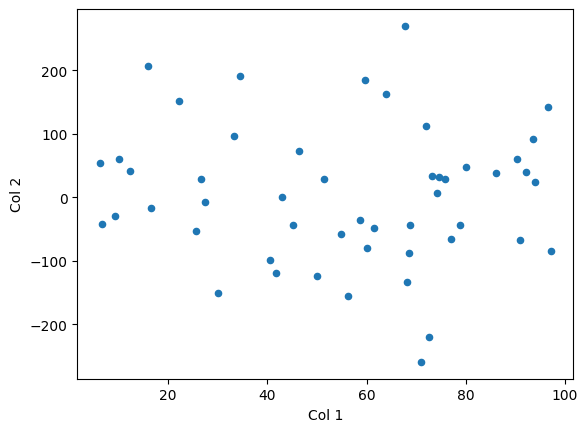

In [ ]:
# 2.3 Estadásticas descriptivas
import pandas as pd
import numpy as np
diccionario = { "Col 1": [np.random.uniform(1,100) for x in range(1,51)], "Col 2": [np.random.normal(0,100) for x in range(1,51)], "Col 3": [np.random.normal() for x in range(1,51)]}
diccionario
df3 = pd.DataFrame(diccionario)
print(df3.head())
print(f"Estadisticas descriptivas de las columnas: \n{df3.describe()}")
# Cálculo de las estadísticas de dispersión
desviacion_estandar = df3.std()
varianza = df3.var()
rango = df3.max() - df3.min()
IQR = df3.quantile(0.75) - df3.quantile(0.25)
coef_var = df3.std() / df3.mean()
print(f"Desviación estándar: \n{desviacion_estandar}")
print(f"Varianza: \n{varianza}")
print(f"Rango: \n{rango}")
print(f"IQR: \n{IQR}")
print(f"Coeficiente de variación: \n{coef_var}")
# Graficar
import matplotlib.pyplot as plt
df3.plot.scatter(x='Col 1', y='Col 2')
plt.show()